In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D # Changed Convo2D to Conv2D
from keras.callbacks import EarlyStopping
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

In [ ]:
n_classes = len(set(y_train))
y_train = to_categorical(y_train,n_classes)
y_test = to_categorical(y_test,n_classes)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]

In [ ]:
batch_size = 128
n_epochs = 100

In [ ]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.8706 - loss: 0.4040 - val_accuracy: 0.9851 - val_loss: 0.0514
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9775 - loss: 0.0753 - val_accuracy: 0.9887 - val_loss: 0.0408
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9841 - loss: 0.0525 - val_accuracy: 0.9889 - val_loss: 0.0412
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9870 - loss: 0.0427 - val_accuracy: 0.9883 - val_loss: 0.0419
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.9889 - val_loss: 0.0440
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9906 - val_loss: 0.0393
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9904 - val_loss: 0.0428
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9910 - val_loss: 0.0424
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9927 - loss: 0.0225 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


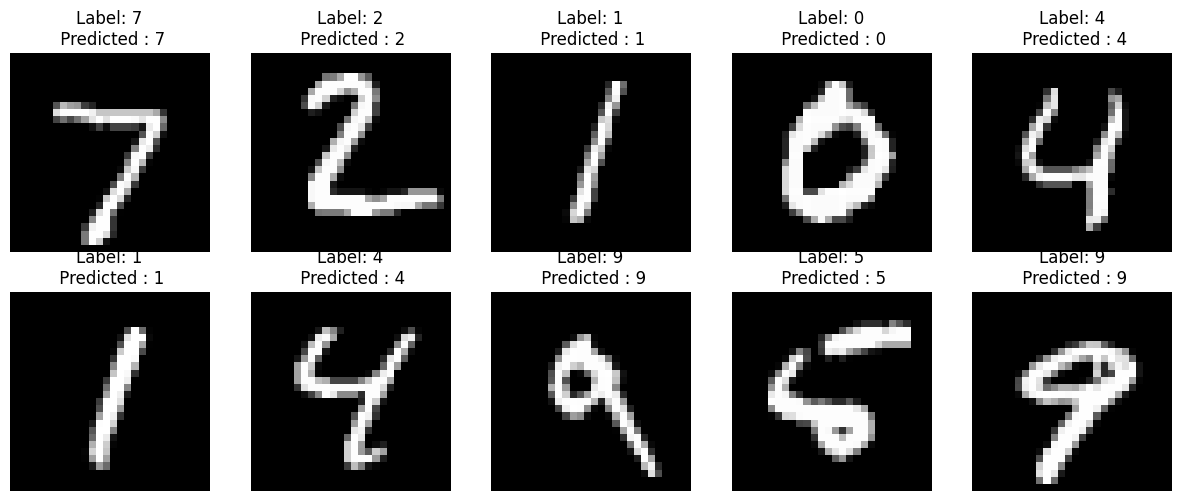

In [ ]:
n_examples = 10

preds = model.predict(X_test)
plt.figure(figsize= (15,15))
for i in range(n_examples):
  # Changed n_examples/2 to int(n_examples/2) to ensure integer values
  ax = plt.subplot(int(n_examples/2), int(n_examples/2), i+1)
  plt.imshow(X_test[i].reshape(28,28),cmap='gray')
  plt.title("Label: {}\n Predicted : {}".format(np.argmax(y_test[i]),np.argmax(preds[i])) )
  plt.axis('off')
plt.show()

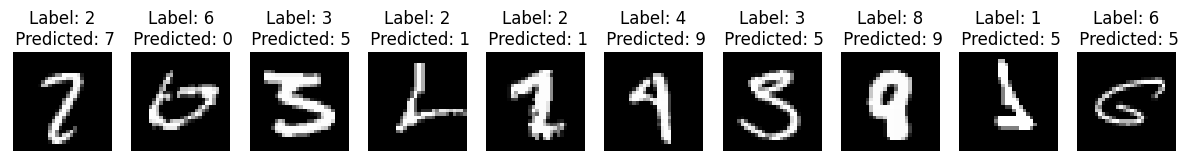

In [ ]:
plt.figure(figsize=(15,15))
j = 1
for i in range(len(y_test)):
  if(j>10):
    break
  label = np.argmax(y_test[i])
  pred = np.argmax(preds[i])
  if label != pred:
    ax = plt.subplot(2,n_examples,j)
    plt.imshow(X_test[i,:,:,0],cmap='gray')
    plt.title("Label: {}\n Predicted: {}".format(label,pred))
    plt.axis('off')
    j+=1
plt.show()